# 特征工程

特征工程是数据预处理的重要组成部分，它涉及从原始数据中提取、构建、选择和转换特征，以便更好地呈现数据背后的潜在规律。以下是每个概念的例子：

1. **特征提取**（Feature Extraction）
- 文本数据：从文本评论中提取关键词、词袋模型或TF-IDF特征。
- 图像数据：从图像中提取颜色直方图、边缘检测特征或深度学习中的卷积神经网络特征。
- 音频数据：从音频信号中提取梅尔频率倒谱系数（MFCC）或语谱图等声学特征。
2. **特征转换**（Feature Transformation）
- 对数变换：将数据取对数，用于处理偏态分布的数据。
- 标准化：将数据缩放到均值为0、标准差为1的标准正态分布。
- 归一化：将数据缩放到特定的范围，通常是[0, 1]或[-1, 1]。
3. **特征选择**（Feature Selection）
- 过滤法：使用统计方法（如方差、相关系数）来选择最相关的特征。
- 包装法：使用机器学习模型来评估不同特征子集的性能，如递归特征消除（Recursive Feature Elimination）。
- 嵌入法：通过在模型中内置特征选择过程，如L1正则化的逻辑回归。
4. **处理缺失值和异常值**
- 缺失值处理：使用均值、中位数、众数等填充缺失值，或者使用插值方法。
- 异常值处理：截断（trimming）离群值、平滑（smoothing）异常值，或者使用基于统计的方法来检测和处理异常值。








## 特征选择

特征选择算法是从原始数据中选择一部分重要的特征，用于构建机器学习模型，以达到减少维度、提高模型性能、避免过拟合等目的。

特征选择通过以下方式实现：

- 过滤法（Filter Methods）：过滤法使用统计方法或相关性度量来评估每个特征与目标变量之间的关系，并基于这些评估选择特征。常见的过滤法包括卡方检验、相关系数、方差分析（ANOVA）等。过滤法是一种快速的特征选择方法，但它们不考虑特征之间的组合效应。

- 包装法（Wrapper Methods）：包装法将特征选择问题视为一个搜索问题，它尝试不同的特征子集，并使用机器学习模型来评估每个子集的性能。常见的包装法包括递归特征消除（Recursive Feature Elimination，RFE）和正向选择。包装法通常更耗时，但可以考虑特征之间的交互作用。

- 嵌入法（Embedded Methods）：嵌入法将特征选择与模型训练过程结合起来，选择最佳的特征子集以最大化模型性能。嵌入法通过在模型中引入特征选择机制来实现，例如，L1正则化的逻辑回归或决策树的特征重要性评估。

### 样例

根据以下数据，采用相关系数法来提取特征，该方法可以计算各个特征与是否购买的相关性，得出哪个特征与是否购买最相关。数据以csv的形式存放在`./data/feature_engineering_1.csv`里。

| 年龄 | 性别 | 收入   | 学历   | 婚姻状况 | 是否有车 | 是否有房 | 购买力 | 是否购买 |
| ---- | ---- | ------ | ------ | -------- | -------- | -------- | ------ | -------- |
| 28   | 男   | 50000  | 学士   | 已婚   | 是       | 否       | 8000   | 是       |
| 35   | 女   | 60000  | 硕士   | 单身   | 否       | 否       | 5000   | 否       |
| 42   | 男   | 75000  | 博士   | 已婚   | 是       | 是       | 9000   | 是       |
| 22   | 女   | 40000  | 本科   | 单身   | 否       | 否       | 1000   | 否       |
| 30   | 男   | 80000  | 硕士   | 已婚   | 是       | 是       | 4000   | 是       |
| 45   | 女   | 90000  | 博士   | 已婚   | 是       | 是       | 7500   | 是       |
| 27   | 男   | 55000  | 本科   | 单身   | 是       | 否       | 2300   | 否       |
| 38   | 女   | 70000  | 硕士   | 已婚   | 是       | 是       | 4000   | 是       |
| 29   | 男   | 48000  | 大专   | 单身   | 否       | 否       | 1700   | 否       |
| 32   | 女   | 62000  | 本科   | 已婚   | 是       | 是       | 4000   | 是       |


注意，这里的代码需要提前安装好必要的库，如pandas、numpy、seaborn等。


采用的特征提取法：相关系数法

是否购买最相关的几个特征：
           是否购买
婚姻状况  1.000000
是否有房  0.816497
是否有车  0.801784
购买力   0.677161
收入    0.673118


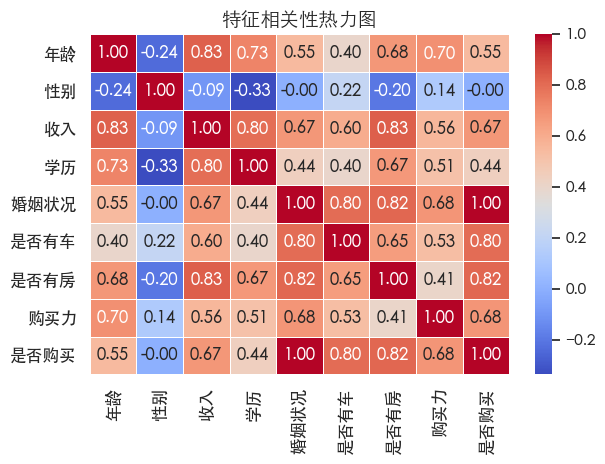

In [1]:
# 导入必要的库
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 读取数据
data = pd.read_csv('./data/feature_engineering_1.csv')

# 将文本型数据转换为数值型数据
data['性别'] = data['性别'].apply(lambda x: 0 if x == '女' else 1)
data['学历'] = data['学历'].replace(['大专', '学士', '本科', '硕士', '博士'], [1, 2, 3, 4, 5])
data['婚姻状况'] = data['婚姻状况'].apply(lambda x: 0 if x == '单身' else 1)
data['是否有车'] = data['是否有车'].apply(lambda x: 0 if x == '否' else 1)
data['是否有房'] = data['是否有房'].apply(lambda x: 0 if x == '否' else 1)
data['是否购买'] = data['是否购买'].apply(lambda x: 0 if x == '否' else 1)

# 标准化处理
data['年龄'] = (data['年龄'] - np.mean(data['年龄'])) / np.std(data['年龄'])
data['收入'] = (data['收入'] - np.mean(data['收入'])) / np.std(data['收入'])
data['购买力'] = (data['购买力'] - np.mean(data['购买力'])) / np.std(data['购买力'])

# 计算相关系数
corr = data.corr()
corr = corr[['是否购买']]
corr = corr.drop('是否购买')

# 取绝对值排序
corr = corr.apply(lambda x: abs(x))
corr = corr.sort_values('是否购买', ascending=False)

# 输出结果
print('采用的特征提取法：相关系数法\n')
print('是否购买最相关的几个特征：\n', corr.head())

# 绘制特征关系图
font = FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc', size=14)

sns.set(font=font.get_name())
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt='.2f', xticklabels=1, yticklabels=1, linewidths=0.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('特征相关性热力图', fontproperties=font)
plt.tight_layout()
plt.show()


## 创建衍生特征

创建衍生特征是指在原始数据的基础上，通过组合、变换、或者统计分析等方法创建新的特征，以更好的描述数据的特性，提高模型的预测性能。衍生特征的创建是机器学习和数据挖掘领域中非常重要的一个步骤，因为它可以使模型更好地利用数据中隐藏的信息，提高模型的精度和泛化能力。

创建衍生特征的算法如下：
1. 多项式特征：通过对原始特征进行幂次扩展，可以创建新的特征，这对于线性模型和核方法等算法很有用。

2. 对数变换：对数变换可以将非线性关系转化为线性关系，使原始特征更符合线性模型的假设。

3. 指数变换：指数变换可以增强某些特征的影响，从而使模型更能够关注这些特征。

4. 独热编码：独热编码将离散型的特征转化为连续型的特征，以便更好地在模型中使用。

5. 特征交叉：特征交叉通过组合多个特征来创建新的特征，以捕捉特征之间的非线性关系。

6. 特征降维：通过降维算法如PCA，可以将高维数据转换为低维数据，以便更好地进行可视化和建模。

7. 时间序列特征：对于时间序列数据，可以通过创建滞后特征、统计特征、周期性特征等方式来提取数据的时间特征，以便更好地进行分析和预测。

### 示例

在如下购物信息的数据集中，我们可以从已有的数据中创建哪些衍生特征呢？

| 用户ID | 年龄 | 性别 | 注册时间     | 最近登录时间       | 购物次数 | 购物总金额 | 平均购物金额 |
|--------|------|------|--------------|-------------------|---------|------------|--------------|
| 1      | 25   | 男   | 2022-01-05   | 2023-09-20 15:30 | 12      | 1200       | 100          |
| 2      | 32   | 女   | 2021-03-15   | 2023-09-21 10:15 | 30      | 4500       | 150          |
| 3      | 22   | 男   | 2022-06-10   | 2023-09-19 14:45 | 8       | 800        | 100          |
| 4      | 29   | 女   | 2022-02-20   | 2023-09-21 16:20 | 18      | 2100       | 116.67       |
| 5      | 35   | 男   | 2020-11-30   | 2023-09-18 11:00 | 45      | 5500       | 122.22       |
| 6      | 28   | 女   | 2021-09-05   | 2023-09-20 09:45 | 25      | 2800       | 112          |
| 7      | 40   | 男   | 2020-05-12   | 2023-09-20 17:30 | 60      | 7200       | 120          |
| 8      | 23   | 女   | 2022-08-18   | 2023-09-19 18:10 | 15      | 1500       | 100          |
| 9      | 31   | 男   | 2021-01-30   | 2023-09-20 14:00 | 22      | 2600       | 118.18       |
| 10     | 26   | 女   | 2022-04-22   | 2023-09-21 12:45 | 10      | 1200       | 120          |


以下是一些可能的衍生特征：

1. 账号活跃度特征：根据注册时间和最近登录时间，可以创建一个表示用户账号活跃度的特征，例如账号活跃天数、距今最后一次登录的天数等。

2. 购物时间特征：可以根据最近登录时间提取购物时间特征，例如购物时段（上午、下午、晚上）、工作日购物次数和周末购物次数等。

3. 年龄分段特征：将年龄分为不同的年龄段，例如青少年、成年人、中年人等，以便更好地分析不同年龄段用户的购物行为。

4. 购物金额分段特征：将购物总金额分为不同的金额段，例如低消费用户、中等消费用户和高消费用户，以进行用户分类和分析。


我们可以通过python代码在原有的数据上增扩内容：

In [2]:
import pandas as pd
from datetime import datetime

# 创建数据集
data = {
    '用户ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    '年龄': [25, 32, 22, 29, 35, 28, 40, 23, 31, 26],
    '性别': ['男', '女', '男', '女', '男', '女', '男', '女', '男', '女'],
    '注册时间': ['2022-01-05', '2021-03-15', '2022-06-10', '2022-02-20', '2020-11-30',
                '2021-09-05', '2020-05-12', '2022-08-18', '2021-01-30', '2022-04-22'],
    '最近登录时间': ['2023-09-20 15:30', '2023-09-21 10:15', '2023-09-19 14:45', '2023-09-21 16:20',
                  '2023-09-18 11:00', '2023-09-20 09:45', '2023-09-20 17:30', '2023-09-19 18:10',
                  '2023-09-20 14:00', '2023-09-21 12:45'],
    '购物次数': [12, 30, 8, 18, 45, 25, 60, 15, 22, 10],
    '购物总金额': [1200, 4500, 800, 2100, 5500, 2800, 7200, 1500, 2600, 1200]
}

df = pd.DataFrame(data)

# 将日期时间字符串转换为日期时间对象
df['注册时间'] = pd.to_datetime(df['注册时间'])
df['最近登录时间'] = pd.to_datetime(df['最近登录时间'])

# 计算距今最后一次登录的天数和注册时间到最后一次登录历时多久
today = datetime.now()
df['距今最后登录天数'] = (today - df['最近登录时间']).dt.days
df['注册到最后登录历时'] = (df['最近登录时间'] - df['注册时间']).dt.days

# 打印结果
print(df)

   用户ID  年龄 性别       注册时间              最近登录时间  购物次数  购物总金额  距今最后登录天数  \
0     1  25  男 2022-01-05 2023-09-20 15:30:00    12   1200        17   
1     2  32  女 2021-03-15 2023-09-21 10:15:00    30   4500        16   
2     3  22  男 2022-06-10 2023-09-19 14:45:00     8    800        18   
3     4  29  女 2022-02-20 2023-09-21 16:20:00    18   2100        15   
4     5  35  男 2020-11-30 2023-09-18 11:00:00    45   5500        19   
5     6  28  女 2021-09-05 2023-09-20 09:45:00    25   2800        17   
6     7  40  男 2020-05-12 2023-09-20 17:30:00    60   7200        16   
7     8  23  女 2022-08-18 2023-09-19 18:10:00    15   1500        17   
8     9  31  男 2021-01-30 2023-09-20 14:00:00    22   2600        17   
9    10  26  女 2022-04-22 2023-09-21 12:45:00    10   1200        16   

   注册到最后登录历时  
0        623  
1        920  
2        466  
3        578  
4       1022  
5        745  
6       1226  
7        397  
8        963  
9        517  


### 练习

以下数据集包含了房屋的各种特征，包括房屋面积、卧室数量、浴室数量、车库面积、地下室面积、建筑年份、房屋类型、社区质量评分和销售价格。

| square_feet | bedrooms | bathrooms | garage_area | basement_area | year_built | house_type      | neighborhood_quality | sale_price |
|-------------|----------|-----------|-------------|---------------|------------|-----------------|----------------------|------------|
| 2000        | 3        | 2         | 400         | 600           | 1995       | Single Family  | 8                    | 250000     |
| 1600        | 2        | 1         | 250         | 500           | 1980       | Apartment      | 6                    | 150000     |
| 2200        | 4        | 3         | 500         | 800           | 2005       | Single Family  | 9                    | 350000     |
| 1800        | 3        | 2         | 350         | 550           | 1990       | Townhouse      | 7                    | 200000     |
| 2400        | 4        | 3         | 450         | 700           | 2010       | Single Family  | 8                    | 400000     |

请首先分析数据集，可以基于数据集创建哪些衍生特征，并用python代码实现(数据集存放于`./data/feature_engineering_2.csv`)


## 特征降维

特征降维是一种减少数据维度的技术，通过保留数据中的主要信息，降低计算复杂度和噪声影响，从而提高数据分析的效率和准确性。

主要的特征降维方法包括：

1. 主成分分析（PCA）： PCA是一种常用的无监督降维方法，它通过线性变换将原始特征投影到一组新的正交特征上，这些新特征被称为主成分。主成分通常按照方差的大小降序排列，因此可以选择最重要的主成分来实现降维。

2. 线性判别分析（LDA）： LDA是一种有监督的降维方法，它试图在降维的同时，最大化不同类别之间的差异，从而提高分类性能。

### 主成分分析

#### 如何理解主成分分析

假设你是一名厨师，你经营一家餐馆，并在菜单上提供各种不同的菜肴。你记录了每道菜肴的成分，包括主要食材的种类和数量。现在，你想要了解如何将这些菜肴区分开来，以便更好地组织你的菜单。

这里的每道菜肴可以看作是一个数据点，而菜肴中的每种成分可以看作是一个特征。但是，你的菜单可能有很多不同的特征，这使得很难理解哪些特征最重要，哪些特征可以忽略，以便更好地理解菜肴之间的差异。

这就是主成分分析派上用场的地方。你可以将主成分分析应用于你的菜肴数据集，以找到一组新的特征（主成分），这些新特征是原始特征的线性组合，但是它们按照方差的大小降序排列。

在这个情景下，主成分可能对应于某种食材的组合或某种烹饪方式。例如，第一个主成分可能主要与肉类相关，第二个主成分可能主要与蔬菜相关，第三个主成分可能与香料相关。通过这种方式，你可以看到哪些主成分最能区分不同的菜肴，哪些主成分包含了最多的信息，以及哪些主成分可以用来简化菜单。

通过主成分分析，你可以更好地理解你的菜肴，以便更好地满足顾客的口味，组织菜单，或者甚至开发新的创意菜肴。这个例子说明了主成分分析在降维和理解复杂数据集方面的应用，它可以帮助你从多个特征中提取出最重要的信息。

#### 步骤

1. 计算数据集的协方差矩阵。
2. 计算协方差矩阵的特征值和特征向量。
3. 选择前k个最大特征值对应的特征向量。
4. 将原始数据投影到这k个特征向量构建的新空间中。

#### 示例

表格展示了包含五个特征（Feature1至Feature5）和十个观测数据点的数据集。这些数据可以用于分析和演示主成分分析（PCA）的过程。

| Feature1 | Feature2 | Feature3 | Feature4 | Feature5 |
|----------|----------|----------|----------|----------|
| 5.1      | 3.5      | 1.4      | 0.2      | 0.2      |
| 4.9      | 3.0      | 1.4      | 0.2      | 0.2      |
| 4.7      | 3.2      | 1.3      | 0.2      | 0.2      |
| 4.6      | 3.1      | 1.5      | 0.2      | 0.2      |
| 5.0      | 3.6      | 1.4      | 0.2      | 0.2      |
| 5.4      | 3.9      | 1.7      | 0.4      | 0.4      |
| 4.6      | 3.4      | 1.4      | 0.3      | 0.3      |
| 5.0      | 3.4      | 1.5      | 0.2      | 0.2      |
| 4.4      | 2.9      | 1.4      | 0.2      | 0.2      |
| 4.9      | 3.1      | 1.5      | 0.1      | 0.1      |

数据集在`./data/feature_engineering_3.csv`


In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# 加载数据集
data = np.genfromtxt('./data/feature_engineering_3.csv', delimiter=',', skip_header=1)

# 提取特征列
X = data[:, :-1]

# 标准化数据
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_standardized = (X - mean) / std_dev

# 创建PCA模型
pca = PCA()

# 拟合PCA模型到数据
pca.fit(X_standardized)

# 获取主成分
principal_components = pca.components_

# 获取方差解释比例
explained_variance_ratio = pca.explained_variance_ratio_

# 将主成分和方差解释比例放入DataFrame
df = pd.DataFrame({'主成分': range(1, len(explained_variance_ratio) + 1),
                   '方差解释比例': explained_variance_ratio})

# 打印DataFrame
print(df)

# 打印主成分和方差解释比例
print("主成分:")
print(principal_components)
print("\n方差解释比例:")
print(explained_variance_ratio)


   主成分    方差解释比例
0    1  0.688089
1    2  0.157410
2    3  0.129114
3    4  0.025386
主成分:
[[ 0.50880122  0.54868165  0.47474845  0.46333969]
 [-0.60992283 -0.02313419 -0.08790411  0.78723048]
 [ 0.19490104  0.49127967 -0.84594304  0.07098059]
 [ 0.57543814 -0.67606031 -0.22642249  0.40068225]]

方差解释比例:
[0.68808946 0.15741043 0.12911383 0.02538628]


### 线性判别分析

线性判别分析（LDA）是一种监督学习算法，主要用于降维、特征提取和分类任务。LDA的核心思想是通过线性变换将原始高维数据映射到低维空间，同时使不同类别之间的距离最大化，同类别之间的距离最小化。

LDA涉及以下几个步骤：

1. 计算每个类别的均值向量。
2. 计算类内散度矩阵。
3. 计算类间散度矩阵。
4. 计算类内散度矩阵的逆和类间散度矩阵之积的特征值和特征向量。
5. 选择前k哥最大特征值对应的特征向量，构成一个pxk的矩阵W。
6. 将原始数据投影到这k特征向量构建的新空间中。

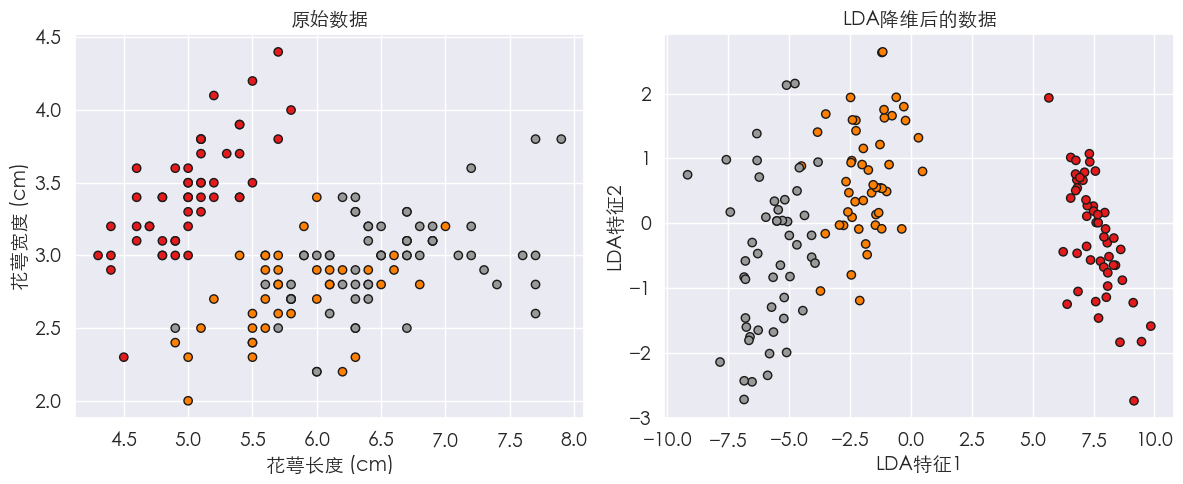

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 加载鸢尾花数据集
iris = load_iris()

# 使用线性判别分析（LDA）对数据进行降维
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(iris.data, iris.target)

# 设置中文字体
font = FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc', size=14)

# 绘制原始数据散点图
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('花萼长度 (cm)', fontproperties=font)
plt.ylabel('花萼宽度 (cm)', fontproperties=font)
plt.title('原始数据', fontproperties=font)
plt.xticks(fontproperties=font)
plt.yticks(fontproperties=font)
plt.tight_layout()

# 绘制LDA降维后的散点图
plt.subplot(122)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=iris.target, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('LDA特征1', fontproperties=font)
plt.ylabel('LDA特征2', fontproperties=font)
plt.title('LDA降维后的数据', fontproperties=font)
plt.xticks(fontproperties=font)
plt.yticks(fontproperties=font)
plt.tight_layout()

plt.show()


从图中可以看出，经过线性判别分析后，数据之间的界限更明显了